# Deep Learning Fixed_year

In [1]:
"""

@ author: Taehyeong Kim, Fusion Data Analytics and Artificial Intelligence Lab

"""

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow import keras

from keras.models import Input, Model, load_model
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import random

SEED=1011

def set_seeds(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)

set_seeds()

data=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/AsiaSim_IJIE/M4/data/sample_data_2500.xlsx")
data.head()

,NIIN,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Forecasting
0,1,76.0,52.0,18.0,25.0,19.0,9.0,112.0,0.0,5.0
1,2,34.0,80.0,54.0,1.0,73.0,7.0,60.0,42.0,34.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NIIN         2500 non-null   int64  
 1   Y2010        2500 non-null   float64
 2   Y2011        2500 non-null   float64
 3   Y2012        2500 non-null   float64
 4   Y2013        2500 non-null   float64
 5   Y2014        2500 non-null   float64
 6   Y2015        2500 non-null   float64
 7   Y2016        2500 non-null   float64
 8   Y2017        2500 non-null   float64
 9   Forecasting  2500 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 195.4 KB


In [3]:
data=data.drop("NIIN", axis=1)
float_columns=[]
for _ in data.T.columns:
    if np.mean(data.T[_]!=data.T[_].astype("int"))==True:
        float_columns.append(_)
data.T[float_columns]

,103,115,116,123,152,154,158,163,175,186,187,195,196,213,221,222,228,234,497,542,563,567,615,616,711,747,863,911,940,981,988,1062,1264,1281,1323,1360,1367,1368,1369,1370,...,2352,2355,2356,2357,2358,2359,2360,2361,2398,2399,2400,2401,2406,2408,2413,2414,2415,2416,2420,2421,2422,2425,2429,2430,2431,2432,2434,2445,2449,2469,2473,2477,2478,2479,2483,2484,2488,2491,2492,2499
Y2010,62.10,10.09,2.16,28.89,4.47,6.04,5.04,22.30,11.27,6.34,8.30,6.27,2.18,3.45,7.30,15.27,5.76,4.52,0.01,0.20,0.85,6.86,11.05,36.82,1.71,0.53,0.53,0.50,0.02,1.36,184.57,43.96,6.28,1.78,116.99,5.26,0.50,13.64,6.09,22.09,...,0.07,1.18,1.48,1.57,12.42,0.56,6.31,1.99,0.50,0.97,5.01,0.81,0.01,0.10,0.78,1.64,1.01,1.13,8.15,0.60,0.62,2.05,2.08,1.42,0.01,1.06,0.70,1.39,37.24,0.41,33.75,0.29,0.02,4.90,0.31,0.96,0.18,3.55,2.41,3.47
Y2011,33.66,5.69,2.97,25.18,4.22,5.86,11.67,9.13,8.39,7.16,8.13,1.97,5.13,7.69,8.63,14.51,5.14,7.55,0.52,0.54,0.31,13.11,18.75,28.32,6.10,0.24,2.71,2.60,1.31,1.39,272.82,38.95,78.60,0.72,154.87,4.69,14.21,33.12,17.74,25.71,...,0.76,1.04,0.33,8.39,3.55,2.82,0.82,0.58,1.24,0.93,0.44,0.13,0.01,0.43,0.24,1.04,1.24,0.40,5.01,1.79,1.83,0.79,1.07,0.89,0.32,0.29,0.02,0.35,27.95,0.09,57.92,0.84,0.80,1.98,3.86,1.29,0.02,1.26,0.61,1.66
Y2012,94.70,6.97,3.91,16.05,5.42,5.94,10.53,8.50,13.48,3.64,11.05,3.01,4.28,5.61,6.56,6.35,1.60,6.47,3.02,0.57,0.38,3.84,18.51,46.73,2.58,0.34,1.15,2.60,0.02,1.20,102.98,18.93,4.07,0.16,131.18,5.39,12.39,43.05,11.63,27.96,...,0.14,0.23,2.76,4.85,6.49,1.54,5.24,4.47,0.16,2.65,0.17,0.13,0.21,1.08,2.92,4.53,2.16,1.41,3.49,3.03,0.41,0.36,3.80,2.56,2.36,0.30,0.03,0.22,6.27,2.79,54.29,0.62,0.20,1.68,3.30,4.70,1.18,2.49,2.25,2.93
Y2013,19.65,2.85,3.01,70.83,1.05,8.76,10.52,6.55,5.70,4.77,11.76,7.38,3.71,1.65,3.45,7.16,2.06,6.10,1.31,0.38,0.20,1.07,12.52,18.58,0.87,0.25,0.80,1.60,0.04,1.87,40.66,18.27,12.26,0.13,73.29,6.35,12.79,17.74,5.34,22.42,...,0.47,1.01,1.02,2.38,6.04,101.62,1.35,0.62,1.22,0.54,0.40,0.97,0.12,0.31,0.94,2.64,1.22,1.55,6.26,2.63,1.22,0.13,0.97,2.03,0.52,0.69,0.01,1.04,18.61,0.39,52.83,0.34,0.06,3.04,6.14,3.03,0.28,2.53,1.64,0.99
Y2014,24.50,5.86,1.62,34.17,0.57,6.22,13.13,7.71,7.53,5.04,2.19,9.68,3.29,5.66,5.62,7.28,1.36,4.79,0.20,0.15,0.99,2.96,5.88,16.12,0.90,0.66,0.95,0.20,0.05,2.07,9.14,7.06,9.30,0.06,111.66,10.40,9.67,26.19,6.29,16.47,...,0.06,0.24,1.52,2.32,3.44,3.05,1.06,0.18,0.73,2.80,1.85,1.57,0.23,0.33,0.31,1.67,1.04,1.91,5.20,1.98,1.37,0.34,2.40,1.88,0.63,0.79,0.58,0.02,1.31,0.09,48.90,5.03,0.01,1.63,0.68,5.43,0.02,2.40,0.98,0.31
Y2015,8.70,4.88,1.28,26.82,2.06,4.11,4.23,4.49,5.08,6.02,2.96,4.56,1.30,1.87,5.34,4.11,0.65,10.11,0.71,0.05,0.13,3.09,6.85,18.14,2.66,0.75,0.28,3.45,0.02,2.76,4.56,1.12,7.10,0.60,42.79,6.31,7.19,15.17,3.18,18.79,...,0.04,1.09,0.18,2.02,1.65,3.13,1.24,0.06,1.33,0.86,1.05,0.71,0.35,0.05,0.44,2.12,1.62,1.54,3.17,1.80,0.52,0.56,2.68,0.95,0.51,0.30,0.59,0.02,10.56,0.01,44.38,0.13,0.02,0.38,1.56,3.43,0.67,1.72,1.34,0.48
Y2016,2.26,4.74,1.11,25.45,0.83,2.91,7.29,5.18,6.50,5.92,1.91,5.63,2.06,1.41,6.41,5.39,1.01,3.01,0.15,0.20,0.11,0.98,9.90,16.32,0.85,0.83,0.28,4.45,1.03,2.73,6.73,0.60,10.33,1.35,74.98,1.87,2.40,5.68,2.75,14.91,...,0.01,1.23,0.62,3.64,2.46,173.82,1.56,0.83,1.73,0.34,0.15,1.30,0.14,0.44,1.39,1.67,2.35,0.84,5.28,2.02,0.91,0.02,0.65,1.29,0.44,0.57,0.08,0.12,19.50,0.16,45.37,0.14,0.04,1.38,0.26,0.69,0.07,1.95,1.27,0.41
Y2017,2.96,6.54,4.04,16.10,1.77,4.55,4.23,1.31,3.69,5.46,2.37,3.88,3.40,2.76,3.86,8.39,0.19,4.27,1.41,0.05,0.05,1.20,6.92,15.96,0.95,0.10,0.47,4.40,0.02,2.41,3.41,1.03,6.12,0.46,187.36,1.65,26.50,26.86,1.59,19.58,...,0.11,0.38,0.84,4.87,3.18,2.04,1.46,1.73,1.22,1.91,0.54,0.03,0.18,0.02,1.51,1.44,3.36,1.53,5.71,2.20,0.56,0.08,3.35,2.92,0.98,0.29,0.02,0.12,10.41,0.37,41.85,0.31,0.03,0.21,0.38,0.58,0.16,1.84,0.56,1.25
Forecasting,13.38,6.29,0.05,23.12,0.95,4.14,8.28,7.61,4.85,7.07,0.14,6.97,1.97,3.25,6.90,7.13,9.98,3.80,3.22,0.05,2.07,0.04,14.67,16.94,0.58,0.21,0.04,2.70,0.04,2.51,2.95,0.23,20.09,1.10,163.83,1.49,35.18,34.47,3.80,39.51,...,0.46,0.37,1.6

In [4]:
train = data.iloc[:,:-1]
test = data.iloc[:,1:]

train.shape, test.shape

((2500, 8), (2500, 8))

In [5]:
X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1:]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2500, 7), (2500, 1), (2500, 7), (2500, 1))

## 1. Machine Learning

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

In [7]:
estimator1 = LinearRegression(n_jobs=-1)
estimator2 = Ridge(random_state = SEED)
estimator3 = Lasso(random_state = SEED)
estimator4 = ElasticNet(random_state = SEED)
estimator5 = KNeighborsRegressor(n_jobs = -1)
estimator6 = DecisionTreeRegressor(random_state = SEED)
estimator7 = RandomForestRegressor(n_jobs=-1, random_state = SEED)

base_estimators = [estimator1, estimator2, estimator3, estimator4, estimator5, estimator6, estimator7]
model_name = ["LR", "Ridge", "Lasso", "Elastic", "KNN", "DT", "RF"]

for estimator, name in zip(base_estimators, model_name):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("==========")
    print("{0} model MAE is {1}".format(name, mae))
    print("{0} model RMSE is {1}".format(name, rmse))
    print("==========")

LR model MAE is 18.525172729641376
LR model RMSE is 82.36899668186575
Ridge model MAE is 18.52517194149392
Ridge model RMSE is 82.36899156652042
Lasso model MAE is 18.517697979263065
Lasso model RMSE is 82.32734261868109
Elastic model MAE is 18.52044876444637
Elastic model RMSE is 82.34174249786824
KNN model MAE is 15.413732000000001
KNN model RMSE is 88.96416458448873
DT model MAE is 17.16184626542369
DT model RMSE is 76.191512246477


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


RF model MAE is 14.741666943899908
RF model RMSE is 64.25731552591621


## 2. Deep Learning

In [8]:
BATCH_SIZE=512
EPOCHS=200

### 2.1 MLP

In [9]:
inputs = Input(shape=(X_train.shape[1],))
x = layers.Dense(64, activation="relu")(inputs)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="linear")(x)
model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0     

Epoch 1/200
4/4 [==============================] - 3s 84ms/step - loss: 22546.9844 - mae: 26.4048 - val_loss: 106903.3672 - val_mae: 40.6153
Epoch 2/200
4/4 [==============================] - 0s 13ms/step - loss: 30350.6035 - mae: 24.7727 - val_loss: 100190.8203 - val_mae: 39.6924
Epoch 3/200
4/4 [==============================] - 0s 12ms/step - loss: 13039.8115 - mae: 23.2008 - val_loss: 93913.3516 - val_mae: 38.8849
Epoch 4/200
4/4 [==============================] - 0s 13ms/step - loss: 19920.5527 - mae: 23.2330 - val_loss: 88548.9922 - val_mae: 38.0960
Epoch 5/200
4/4 [==============================] - 0s 13ms/step - loss: 15315.9609 - mae: 22.8681 - val_loss: 84304.9062 - val_mae: 37.3913
Epoch 6/200
4/4 [==============================] - 0s 12ms/step - loss: 21716.8594 - mae: 22.3807 - val_loss: 80659.0625 - val_mae: 36.7801
Epoch 7/200
4/4 [==============================] - 0s 12ms/step - loss: 21388.4941 - mae: 23.5502 - val_loss: 77965.3047 - val_mae: 36.3920
Epoch 8/200
4/4 [=

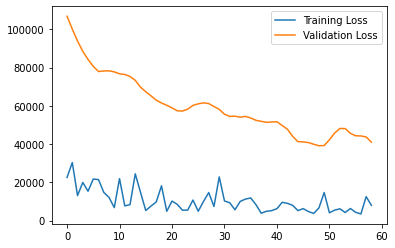

In [10]:
model.compile(optimizer="adam", loss='mean_squared_error', metrics="mae")

callbacks_list = [
    
    ModelCheckpoint(filepath="mlp.h5", 
                    verbose=0,
                    save_best_only=True),

    EarlyStopping(monitor='val_loss', patience=10)
    
]

history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=callbacks_list,
                    validation_split=0.2)

model = load_model("mlp.h5")

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [11]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("{0} model score is {1}".format("MLP", mae))
print("{0} model score is {1}".format("MLP", rmse))

MLP model score is 13.293204347798822
MLP model score is 64.13964447447515


### 2.2 RNN

In [12]:
inputs = Input(shape=(X_train.shape[1], 1))
x = layers.SimpleRNN(64)(inputs)
x = layers.LayerNormalization()(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="linear")(x)
model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 7, 1)]            0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                4224      
_________________________________________________________________
layer_normalization (LayerNo (None, 64)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 6,465
Trainable params: 6,465
Non-trainable params: 0
_________________________________________________________

Epoch 1/200
4/4 [==============================] - 4s 116ms/step - loss: 36553.1289 - mae: 32.0278 - val_loss: 149360.7188 - val_mae: 50.0713
Epoch 2/200
4/4 [==============================] - 0s 20ms/step - loss: 36470.4961 - mae: 31.6977 - val_loss: 149235.1250 - val_mae: 49.9753
Epoch 3/200
4/4 [==============================] - 0s 23ms/step - loss: 36390.8555 - mae: 31.4817 - val_loss: 149104.5312 - val_mae: 49.7437
Epoch 4/200
4/4 [==============================] - 0s 21ms/step - loss: 36319.0938 - mae: 31.2256 - val_loss: 148976.0312 - val_mae: 49.5195
Epoch 5/200
4/4 [==============================] - 0s 25ms/step - loss: 36226.9258 - mae: 30.9987 - val_loss: 148844.5625 - val_mae: 49.2782
Epoch 6/200
4/4 [==============================] - 0s 20ms/step - loss: 36151.1289 - mae: 30.7728 - val_loss: 148707.3750 - val_mae: 48.9942
Epoch 7/200
4/4 [==============================] - 0s 24ms/step - loss: 36058.3750 - mae: 30.5244 - val_loss: 148563.9062 - val_mae: 48.7169
Epoch 8/200


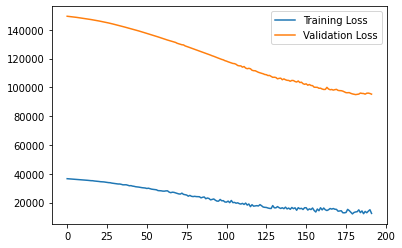

In [13]:
model.compile(optimizer="adam", loss='mean_squared_error', metrics="mae")

callbacks_list = [
    
    ModelCheckpoint(filepath="rnn.h5", 
                    verbose=0,
                    save_best_only=True),

    EarlyStopping(monitor='val_loss', patience=10)
    
]

history = model.fit(X_train.values.reshape(X_train.shape[0],X_train.shape[1],1),
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=callbacks_list,
                    validation_split=0.2)

model = load_model("rnn.h5")

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [14]:
y_pred = model.predict(X_test.values.reshape(X_test.shape[0],X_test.shape[1],1))
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("{0} model score is {1}".format("RNN", mae))
print("{0} model score is {1}".format("RNN", rmse))

RNN model score is 17.6545797651453
RNN model score is 151.51652554993794


### 2.3 LSTM

In [15]:
inputs = Input(shape=(X_train.shape[1], 1))
x = layers.LSTM(64)(inputs)
x = layers.LayerNormalization()(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="linear")(x)
model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 7, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
layer_normalization_1 (Layer (None, 64)                128       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 19,137
Trainable params: 19,137
Non-trainable params: 0
_______________________________________________________

Epoch 1/200
4/4 [==============================] - 4s 217ms/step - loss: 36731.8477 - mae: 33.2363 - val_loss: 149668.5312 - val_mae: 50.7610
Epoch 2/200
4/4 [==============================] - 0s 15ms/step - loss: 36665.2188 - mae: 32.4541 - val_loss: 149569.9219 - val_mae: 50.5189
Epoch 3/200
4/4 [==============================] - 0s 14ms/step - loss: 36593.6992 - mae: 32.2127 - val_loss: 149465.6250 - val_mae: 50.4833
Epoch 4/200
4/4 [==============================] - 0s 14ms/step - loss: 36535.5352 - mae: 32.0238 - val_loss: 149376.2969 - val_mae: 50.3584
Epoch 5/200
4/4 [==============================] - 0s 16ms/step - loss: 36468.0234 - mae: 31.8174 - val_loss: 149262.5625 - val_mae: 50.1754
Epoch 6/200
4/4 [==============================] - 0s 16ms/step - loss: 36419.6680 - mae: 31.5993 - val_loss: 149169.9531 - val_mae: 49.9086
Epoch 7/200
4/4 [==============================] - 0s 14ms/step - loss: 36349.8633 - mae: 31.3036 - val_loss: 149080.0781 - val_mae: 49.6137
Epoch 8/200


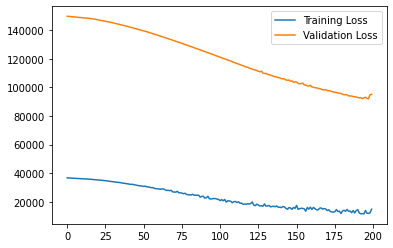

In [16]:
model.compile(optimizer="adam", loss='mean_squared_error', metrics="mae")

callbacks_list = [
    
    ModelCheckpoint(filepath="lstm.h5", 
                    verbose=0,
                    save_best_only=True),

    EarlyStopping(monitor='val_loss', patience=10)
    
]

history = model.fit(X_train.values.reshape(X_train.shape[0],X_train.shape[1],1),
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=callbacks_list,
                    validation_split=0.2)

model = load_model("lstm.h5")

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [17]:
y_pred = model.predict(X_test.values.reshape(X_test.shape[0],X_test.shape[1],1))
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("{0} model score is {1}".format("LSTM", mae))
print("{0} model score is {1}".format("LSTM", rmse))

LSTM model score is 17.05709708716726
LSTM model score is 146.27534923413708


### 2.4 GRU

In [18]:
inputs = Input(shape=(X_train.shape[1], 1))
x = layers.GRU(64)(inputs)
x = layers.LayerNormalization()(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="linear")(x)
model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 7, 1)]            0         
_________________________________________________________________
gru (GRU)                    (None, 64)                12864     
_________________________________________________________________
layer_normalization_2 (Layer (None, 64)                128       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 15,105
Trainable params: 15,105
Non-trainable params: 0
_______________________________________________________

Epoch 1/200
4/4 [==============================] - 3s 186ms/step - loss: 36708.3242 - mae: 32.7541 - val_loss: 149627.0469 - val_mae: 50.4402
Epoch 2/200
4/4 [==============================] - 0s 14ms/step - loss: 36627.6250 - mae: 32.1799 - val_loss: 149509.4531 - val_mae: 50.5853
Epoch 3/200
4/4 [==============================] - 0s 14ms/step - loss: 36552.1289 - mae: 32.2056 - val_loss: 149406.1562 - val_mae: 50.5892
Epoch 4/200
4/4 [==============================] - 0s 14ms/step - loss: 36498.2969 - mae: 32.0236 - val_loss: 149299.8906 - val_mae: 50.4516
Epoch 5/200
4/4 [==============================] - 0s 14ms/step - loss: 36423.1406 - mae: 31.8250 - val_loss: 149205.0469 - val_mae: 50.2715
Epoch 6/200
4/4 [==============================] - 0s 18ms/step - loss: 36377.4531 - mae: 31.6284 - val_loss: 149116.2344 - val_mae: 50.0516
Epoch 7/200
4/4 [==============================] - 0s 14ms/step - loss: 36318.5391 - mae: 31.4380 - val_loss: 149024.4062 - val_mae: 49.8171
Epoch 8/200


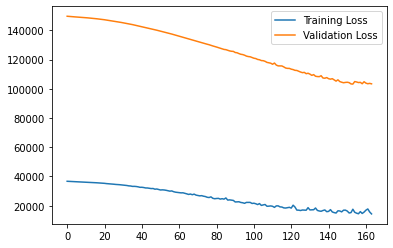

In [19]:
model.compile(optimizer="adam", loss='mean_squared_error', metrics="mae")

callbacks_list = [
    
    ModelCheckpoint(filepath="gru.h5", 
                    verbose=0,
                    save_best_only=True),

    EarlyStopping(monitor='val_loss', patience=10)
    
]

history = model.fit(X_train.values.reshape(X_train.shape[0],X_train.shape[1],1),
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=callbacks_list,
                    validation_split=0.2)

model = load_model("gru.h5")

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [20]:
y_pred = model.predict(X_test.values.reshape(X_test.shape[0],X_test.shape[1],1))
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("{0} model score is {1}".format("GRU", mae))
print("{0} model score is {1}".format("GRU", rmse))

GRU model score is 18.68764831338525
GRU model score is 160.40669797182056


## 3. Attention

In [21]:
from tensorflow.keras import backend as K

def attention_3d_block(inputs):
    
    input_dim = int(inputs.shape[2])                      # input shape = (batch_size, time_steps, input_dim)
    att = layers.Dense(1, activation='tanh')(inputs)      # shape = batch * time_steps * 1
    att = layers.Flatten()(att)                           # shape = batch * time_steps
    att = layers.Activation('softmax')(att)               # shape = batch * time_steps
    att = layers.RepeatVector(input_dim)(att)             # shape = batch * input_dim * time_steps
    att = layers.Permute([2, 1])(att)                     # shape = batch * time_step * input_dim
    att = layers.Multiply()([inputs, att])                # shape = batch * time_step * input_dim
    att = layers.Lambda(lambda x: K.sum(x, axis=-2),
                        output_shape=(input_dim,))(att)   # shape = batch * input_dim

    return att

### 3.1 Attention RNN

In [22]:
inputs = Input(shape=(X_train.shape[1], 1))
x = layers.SimpleRNN(64, return_sequences=True)(inputs)
x = layers.LayerNormalization()(x)
x = attention_3d_block(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="linear")(x)
model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 7, 1)]       0                                            
__________________________________________________________________________________________________
simple_rnn_1 (SimpleRNN)        (None, 7, 64)        4224        input_5[0][0]                    
__________________________________________________________________________________________________
layer_normalization_3 (LayerNor (None, 7, 64)        128         simple_rnn_1[0][0]               
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 7, 1)         65          layer_normalization_3[0][0]      
____________________________________________________________________________________________

Epoch 1/200
4/4 [==============================] - 2s 237ms/step - loss: 36568.7383 - mae: 31.8789 - val_loss: 149412.4219 - val_mae: 50.3599
Epoch 2/200
4/4 [==============================] - 0s 22ms/step - loss: 36511.4023 - mae: 31.8923 - val_loss: 149335.2344 - val_mae: 50.4186
Epoch 3/200
1/4 [======>.......................] - ETA: 0s - loss: 19902.9902 - mae: 29.9351

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


4/4 [==============================] - 0s 27ms/step - loss: 36457.9258 - mae: 31.8498 - val_loss: 149271.2656 - val_mae: 50.2766
Epoch 4/200
4/4 [==============================] - 0s 24ms/step - loss: 36415.0312 - mae: 31.6349 - val_loss: 149203.2812 - val_mae: 50.0103
Epoch 5/200
4/4 [==============================] - 0s 25ms/step - loss: 36367.9336 - mae: 31.4381 - val_loss: 149124.8438 - val_mae: 49.8820
Epoch 6/200
4/4 [==============================] - 0s 21ms/step - loss: 36330.7773 - mae: 31.3583 - val_loss: 149042.2344 - val_mae: 49.8240
Epoch 7/200
4/4 [==============================] - 0s 24ms/step - loss: 36280.8750 - mae: 31.2281 - val_loss: 148955.8125 - val_mae: 49.6891
Epoch 8/200
4/4 [==============================] - 0s 24ms/step - loss: 36225.8125 - mae: 31.1017 - val_loss: 148865.7031 - val_mae: 49.5196
Epoch 9/200
4/4 [==============================] - 0s 27ms/step - loss: 36156.4141 - mae: 30.8769 - val_loss: 148767.6875 - val_mae: 49.3183
Epoch 10/200
4/4 [=======

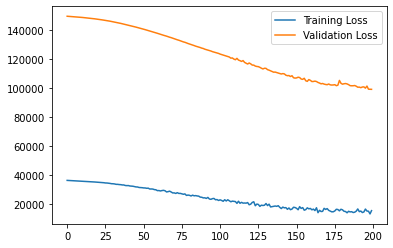

In [23]:
model.compile(optimizer="adam", loss='mean_squared_error', metrics="mae")

callbacks_list = [
    
    ModelCheckpoint(filepath="att_rnn.h5", 
                    verbose=0,
                    save_best_only=True),

    EarlyStopping(monitor='val_loss', patience=10)
    
]

history = model.fit(X_train.values.reshape(X_train.shape[0],X_train.shape[1],1),
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=callbacks_list,
                    validation_split=0.2)

model = load_model("att_rnn.h5")

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [24]:
y_pred = model.predict(X_test.values.reshape(X_test.shape[0],X_test.shape[1],1))
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("{0} model MAE is {1}".format("Att-RNN", mae))
print("{0} model RMSE is {1}".format("Att-RNN", rmse))

Att-RNN model MAE is 18.424794409251213
Att-RNN model RMSE is 152.8471981078972


### 3.2 Attention LSTM

In [25]:
inputs = Input(shape=(X_train.shape[1], 1))
x = layers.LSTM(64, return_sequences=True)(inputs)
x = layers.LayerNormalization()(x)
x = attention_3d_block(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="linear")(x)
model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 7, 1)]       0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 7, 64)        16896       input_6[0][0]                    
__________________________________________________________________________________________________
layer_normalization_4 (LayerNor (None, 7, 64)        128         lstm_1[0][0]                     
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 7, 1)         65          layer_normalization_4[0][0]      
____________________________________________________________________________________________

Epoch 1/200
4/4 [==============================] - 3s 234ms/step - loss: 36559.0625 - mae: 31.8821 - val_loss: 149422.9844 - val_mae: 50.0976
Epoch 2/200
4/4 [==============================] - 0s 17ms/step - loss: 36520.5039 - mae: 31.7520 - val_loss: 149298.9375 - val_mae: 50.2033
Epoch 3/200
1/4 [======>.......................] - ETA: 0s - loss: 19886.0469 - mae: 29.8435

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


4/4 [==============================] - 0s 20ms/step - loss: 36443.3828 - mae: 31.7903 - val_loss: 149232.5625 - val_mae: 50.3026
Epoch 4/200
4/4 [==============================] - 0s 21ms/step - loss: 36407.2461 - mae: 31.7957 - val_loss: 149177.6250 - val_mae: 50.3148
Epoch 5/200
4/4 [==============================] - 0s 18ms/step - loss: 36358.8594 - mae: 31.7471 - val_loss: 149121.9844 - val_mae: 50.2696
Epoch 6/200
4/4 [==============================] - 0s 17ms/step - loss: 36326.1406 - mae: 31.6643 - val_loss: 149062.6562 - val_mae: 50.1652
Epoch 7/200
4/4 [==============================] - 0s 18ms/step - loss: 36292.2422 - mae: 31.5492 - val_loss: 149001.5156 - val_mae: 50.0075
Epoch 8/200
4/4 [==============================] - 0s 18ms/step - loss: 36260.4141 - mae: 31.3566 - val_loss: 148913.5469 - val_mae: 49.8480
Epoch 9/200
4/4 [==============================] - 0s 18ms/step - loss: 36187.0977 - mae: 31.2363 - val_loss: 148834.6562 - val_mae: 49.6387
Epoch 10/200
4/4 [=======

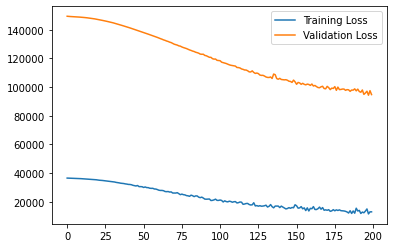

In [26]:
model.compile(optimizer="adam", loss='mean_squared_error', metrics="mae")

callbacks_list = [
    
    ModelCheckpoint(filepath="att_lstm.h5", 
                    verbose=0,
                    save_best_only=True),

    EarlyStopping(monitor='val_loss', patience=10)
    
]

history = model.fit(X_train.values.reshape(X_train.shape[0],X_train.shape[1],1),
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=callbacks_list,
                    validation_split=0.2)

model = load_model("att_lstm.h5")

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [27]:
y_pred = model.predict(X_test.values.reshape(X_test.shape[0],X_test.shape[1],1))
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("{0} model MAE is {1}".format("Att-LSTM", mae))
print("{0} model RMSE is {1}".format("Att-LSTM", rmse))

Att-LSTM model MAE is 18.410827987926243
Att-LSTM model RMSE is 145.1988520924081


### 3.3 Attention GRU

In [28]:
inputs = Input(shape=(X_train.shape[1], 1))
x = layers.GRU(64, return_sequences=True)(inputs)
x = layers.LayerNormalization()(x)
x = attention_3d_block(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="linear")(x)
model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 7, 1)]       0                                            
__________________________________________________________________________________________________
gru_1 (GRU)                     (None, 7, 64)        12864       input_7[0][0]                    
__________________________________________________________________________________________________
layer_normalization_5 (LayerNor (None, 7, 64)        128         gru_1[0][0]                      
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 7, 1)         65          layer_normalization_5[0][0]      
____________________________________________________________________________________________

Epoch 1/200
4/4 [==============================] - 4s 221ms/step - loss: 36678.1133 - mae: 32.4435 - val_loss: 149590.3125 - val_mae: 50.3736
Epoch 2/200
4/4 [==============================] - 0s 17ms/step - loss: 36625.5742 - mae: 32.1101 - val_loss: 149522.5938 - val_mae: 50.3408
Epoch 3/200
1/4 [======>.......................] - ETA: 0s - loss: 20012.5957 - mae: 30.1554

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


4/4 [==============================] - 0s 22ms/step - loss: 36583.4336 - mae: 32.0273 - val_loss: 149455.7500 - val_mae: 50.3475
Epoch 4/200
4/4 [==============================] - 0s 18ms/step - loss: 36537.5625 - mae: 31.9464 - val_loss: 149389.7344 - val_mae: 50.3583
Epoch 5/200
4/4 [==============================] - 0s 18ms/step - loss: 36490.7773 - mae: 31.9297 - val_loss: 149331.5312 - val_mae: 50.3948
Epoch 6/200
4/4 [==============================] - 0s 18ms/step - loss: 36453.9844 - mae: 31.9321 - val_loss: 149274.4844 - val_mae: 50.4234
Epoch 7/200
4/4 [==============================] - 0s 17ms/step - loss: 36423.0000 - mae: 31.9306 - val_loss: 149222.2500 - val_mae: 50.4088
Epoch 8/200
4/4 [==============================] - 0s 18ms/step - loss: 36390.3516 - mae: 31.8739 - val_loss: 149162.1562 - val_mae: 50.3436
Epoch 9/200
4/4 [==============================] - 0s 17ms/step - loss: 36351.4492 - mae: 31.7945 - val_loss: 149094.9219 - val_mae: 50.2187
Epoch 10/200
4/4 [=======

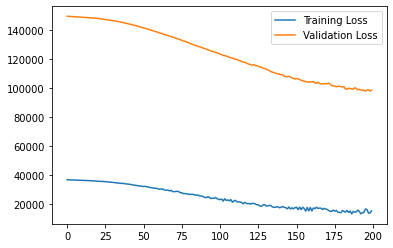

In [29]:
model.compile(optimizer="adam", loss='mean_squared_error', metrics="mae")

callbacks_list = [
    
    ModelCheckpoint(filepath="att_gru.h5", 
                    verbose=0,
                    save_best_only=True),

    EarlyStopping(monitor='val_loss', patience=10)
    
]

history = model.fit(X_train.values.reshape(X_train.shape[0],X_train.shape[1],1),
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=callbacks_list,
                    validation_split=0.2)

model = load_model("att_gru.h5")

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [30]:
y_pred = model.predict(X_test.values.reshape(X_test.shape[0],X_test.shape[1],1))
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("{0} model MAE is {1}".format("Att-GRU", mae))
print("{0} model RMSE is {1}".format("Att-GRU", rmse))

Att-GRU model MAE is 17.62494051990533
Att-GRU model RMSE is 150.4252693426277
